## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Fri Nov 29 02:50:18 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.78       Driver Version: 410.78       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    Off  | 00000000:65:00.0  On |                  N/A |
|  0%   46C    P8     7W / 215W |     61MiB /  7949MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import tensorflow.keras as keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten: # 所有像素 reshape 成一維陣列
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_train, y_train = train
x_test, y_test = test

plt.imshow(x_test[1], interpolation='nearest')
print(len(x_train))
print(len(x_test))

print(y_test[1])

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

50000
10000
[8]


In [6]:
print(len(x_test))
# print(x_test[1])
# plt.imshow(x_test[1], interpolation='nearest')

10000


In [7]:
"""Code Here
建立你的神經網路
"""
# 將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
#     input_layer = keras.layers.Dropout(rate = 0.2)(input_layer)
    # hidden layer
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(rate = 0.2)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(rate = 0.2)(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128])
# model.summary()

In [8]:
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

In [9]:
model_5L = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 512, 256, 256, 128])
model_5L.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0   

In [10]:
model_10L = build_mlp(input_shape=x_train.shape[1:], num_neurons=[2048, 1024, 512, 512, 512, 256, 256, 256, 128, 128])
model_10L.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0   

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
#layer 3
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
#layer 5
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_5L.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
#layer 10
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_10L.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 74us/sample - loss: 2.0172 - accuracy: 0.2590 - val_loss: 1.8129 - val_accuracy: 0.3457
Epoch 2/100
50000/50000 [==============================] - 3s 57us/sample - loss: 1.8394 - accuracy: 0.3330 - val_loss: 1.6974 - val_accuracy: 0.3951
Epoch 3/100
50000/50000 [==============================] - 3s 57us/sample - loss: 1.7766 - accuracy: 0.3606 - val_loss: 1.6571 - val_accuracy: 0.4108
Epoch 4/100
50000/50000 [==============================] - 3s 57us/sample - loss: 1.7237 - accuracy: 0.3792 - val_loss: 1.6257 - val_accuracy: 0.4176
Epoch 5/100
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6915 - accuracy: 0.3929 - val_loss: 1.5936 - val_accuracy: 0.4338
Epoch 6/100
50000/50000 [==============================] - 3s 57us/sample - loss: 1.6553 - accuracy: 0.4051 - val_loss: 1.5733 - val_accuracy: 0.4375
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 4s 72us/sample - loss: 1.3713 - accuracy: 0.5063 - val_loss: 1.3931 - val_accuracy: 0.5037
Epoch 56/100
50000/50000 [==============================] - 3s 62us/sample - loss: 1.3678 - accuracy: 0.5079 - val_loss: 1.3869 - val_accuracy: 0.5067
Epoch 57/100
50000/50000 [==============================] - 3s 70us/sample - loss: 1.3660 - accuracy: 0.5074 - val_loss: 1.3761 - val_accuracy: 0.5123
Epoch 58/100
50000/50000 [==============================] - 4s 74us/sample - loss: 1.3552 - accuracy: 0.5135 - val_loss: 1.3792 - val_accuracy: 0.5091
Epoch 59/100
50000/50000 [==============================] - 4s 73us/sample - loss: 1.3562 - accuracy: 0.5132 - val_loss: 1.4000 - val_accuracy: 0.5057
Epoch 60/100
50000/50000 [==============================] - 4s 73us/sample - loss: 1.3536 - accuracy: 0.5148 - val_loss: 1.3711 - val_accuracy: 0.5144
Epoch 61/100
50000/50000 [==============================] - 4s 73us/sample - loss: 1.3467 - ac

In [16]:
model_5L.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 144us/sample - loss: 2.0729 - accuracy: 0.2224 - val_loss: 1.8497 - val_accuracy: 0.3285
Epoch 2/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.8735 - accuracy: 0.3138 - val_loss: 1.8036 - val_accuracy: 0.3306
Epoch 3/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.8252 - accuracy: 0.3378 - val_loss: 1.7187 - val_accuracy: 0.3749
Epoch 4/100
50000/50000 [==============================] - 5s 99us/sample - loss: 1.7867 - accuracy: 0.3500 - val_loss: 1.6732 - val_accuracy: 0.4046
Epoch 5/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.7521 - accuracy: 0.3633 - val_loss: 1.6899 - val_accuracy: 0.3894
Epoch 6/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.7283 - accuracy: 0.3775 - val_loss: 1.6270 - val_accuracy: 0.4228
Epoch 7/100
50000/50000 [========================

Epoch 55/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.4221 - accuracy: 0.4907 - val_loss: 1.3991 - val_accuracy: 0.5028
Epoch 56/100
50000/50000 [==============================] - 5s 96us/sample - loss: 1.4176 - accuracy: 0.4938 - val_loss: 1.4164 - val_accuracy: 0.4978
Epoch 57/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.4212 - accuracy: 0.4941 - val_loss: 1.4313 - val_accuracy: 0.4903
Epoch 58/100
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4174 - accuracy: 0.4922 - val_loss: 1.4285 - val_accuracy: 0.4923
Epoch 59/100
50000/50000 [==============================] - 5s 96us/sample - loss: 1.4158 - accuracy: 0.4934 - val_loss: 1.4064 - val_accuracy: 0.5068
Epoch 60/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.4099 - accuracy: 0.4957 - val_loss: 1.4485 - val_accuracy: 0.4867
Epoch 61/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.4151 - ac

In [17]:
model_10L.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 279us/sample - loss: 2.2102 - accuracy: 0.1485 - val_loss: 2.0633 - val_accuracy: 0.1858
Epoch 2/100
50000/50000 [==============================] - 11s 217us/sample - loss: 2.0565 - accuracy: 0.1842 - val_loss: 2.0330 - val_accuracy: 0.1991
Epoch 3/100
50000/50000 [==============================] - 11s 210us/sample - loss: 2.0068 - accuracy: 0.2136 - val_loss: 1.9010 - val_accuracy: 0.2619
Epoch 4/100
50000/50000 [==============================] - 10s 194us/sample - loss: 1.9403 - accuracy: 0.2540 - val_loss: 1.8733 - val_accuracy: 0.2651
Epoch 5/100
50000/50000 [==============================] - 9s 178us/sample - loss: 1.9138 - accuracy: 0.2718 - val_loss: 1.8248 - val_accuracy: 0.3106
Epoch 6/100
50000/50000 [==============================] - 8s 151us/sample - loss: 1.8837 - accuracy: 0.2809 - val_loss: 1.8696 - val_accuracy: 0.3035
Epoch 7/100
50000/50000 [===============

50000/50000 [==============================] - 8s 152us/sample - loss: 1.6137 - accuracy: 0.4207 - val_loss: 1.5699 - val_accuracy: 0.4436
Epoch 55/100
50000/50000 [==============================] - 8s 161us/sample - loss: 1.6152 - accuracy: 0.4209 - val_loss: 1.5783 - val_accuracy: 0.4403
Epoch 56/100
50000/50000 [==============================] - 8s 163us/sample - loss: 1.6174 - accuracy: 0.4195 - val_loss: 1.5820 - val_accuracy: 0.4391
Epoch 57/100
50000/50000 [==============================] - 8s 161us/sample - loss: 1.6046 - accuracy: 0.4224 - val_loss: 1.5702 - val_accuracy: 0.4357
Epoch 58/100
50000/50000 [==============================] - 8s 160us/sample - loss: 1.6027 - accuracy: 0.4220 - val_loss: 1.5675 - val_accuracy: 0.4420
Epoch 59/100
50000/50000 [==============================] - 8s 152us/sample - loss: 1.5997 - accuracy: 0.4260 - val_loss: 1.5638 - val_accuracy: 0.4441
Epoch 60/100
50000/50000 [==============================] - 8s 151us/sample - loss: 1.6025 - accuracy

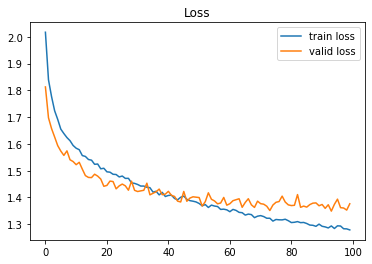

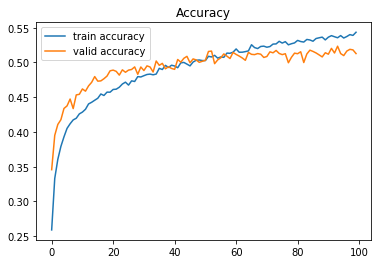

In [18]:
import matplotlib.pyplot as plt

def showScore(history):
    train_loss = history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = history["accuracy"]
    valid_acc = history["val_accuracy"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()
    
showScore(model.history.history)

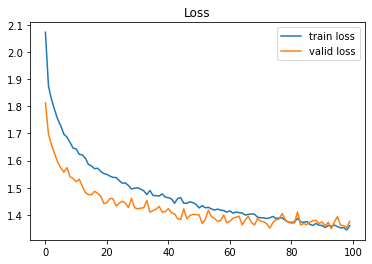

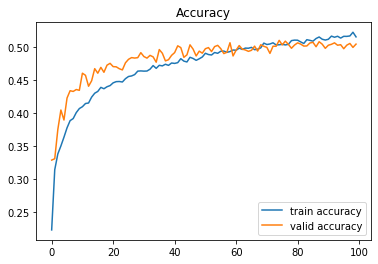

In [19]:
showScore(model_5L.history.history)

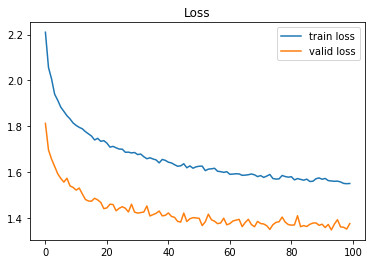

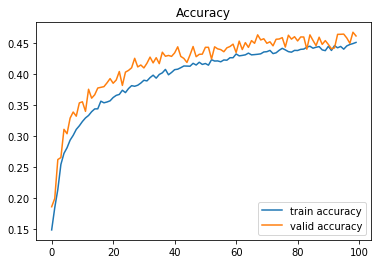

In [20]:
showScore(model_10L.history.history)

增加層數準確率降低